# Introduction to Correlations and Covariance

### Goals:

1. To develop intuition for correlation with visual examples.
2. To understand how a "covariance matrix" encodes infomation about correlations.
3. To understand the difference between "covariance" and "correlation" and the advantages and disadvantages of each.
4. To deepen our understanding with examples of quantities that are highly correlated and quantities that are uncorrelated.

### Timing

1. Try to finish this notebook in 25-30 minutes. 

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1zwrFu82eu1BzMF24ls_l4dBng7_Ht7wf6ehpYuXLGaQ/edit?usp=drive_link

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import datetime

plt.rcParams['font.size'] = 14

### New functions we will use in this module

| Function Name                    | What it does |
| - | - |
| plt.figure                       | Make a matplotlib figure, useful for making figures with subplots |
| fig.subplots                     | Makes subplots for a figure |
| stats.multivariate_normal.rvs    | Takes samples from a multivariate normal distribution. See [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) for details on arguments to the rvs() class method, as well as other class methods you might use to interact with a multivariate normal distribution. |
| np.cov                           | Compute the covariance matrix between multiple data series |
| np.corrcoef                      | Compute the correlation coefficient between multiple data series |

### Variances and covariances:

The **variance** $\sigma^2$ is a measure of the scatter of a quantity:

$$
\sigma^2 = \frac{\sum_i (x_i - \mu_x)}{n}^2
$$,

where $x_i$ are the measurements of the quantity $x$, $n$ is the number of measurements, and $\mu_x$ is the mean of the measurements $\mu_x = \frac{\sum_i x_i}{n}$.

The **covariance** is a measure of how variations in one quantity match variations in a second quantity. 

The equation for the covariance is quite similar to the equation for the variance. Suppose that each data point has has two quantities that describe it, $(x_{i},y_{i})$. (In other words, it's a data point in a multi-dimensional space.) Then the equation for the covariance is:

$$
\sigma_{xy} = \frac{\sum_i (x_i - \mu_x) (y_i - \mu_y)}{n}
$$

i.e., we replace one of the factors of $(x_i - \mu_x)$ with $(y_i - \mu_y)$.

A couple of things to notice about the covariance:

1. If, for a given pair of values, both $(x_i - \mu_x)$ and $(y_i - \mu_y)$ have the same sign, (i.e., they are both above or below the average), then $(x_i - \mu_x) (y_i - \mu_y)$ will be greater than zero.  Conversely, if they have opposite signs, then $(x_i - \mu_x) (y_i - \mu_y)$ will be less than zero.   Thus, the covariance can be either positive or negative.

2. Pairs of values where the absolute values $|(x_i - \mu_x)|$ and $|(y_i - \mu_y)|$ are both large will contribute a lot to the covariance.  Pairs where one of the values is very close to the mean will contribute very little.

Because the equations for the variance and covariance are so similar, we often compute both the variances and covariances at the same time and put all the results in an array or matrix. This is called the **covariance matrix**:

$$
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{yx} & \sigma_{yy} \\
\end{bmatrix}
$$

### Let's make a couple of functions to simulate 2D data with different levels of covariances

The `draw_2d_gaussian` function below draws data from a **pair** of Gaussians centered at zero ($\mu_x = \mu_y = 0$).

We need to specify:

- "axes" → plotting option

- "color" → plotting option

- $n$ → number of data points

- $\sigma_{xx}$ → variance of Gaussian for variable x

- $\sigma_{yy}$ → variance of Gaussian for variable y

- $\sigma_{xy}$ → covariance of Gaussian for variables x and y

We will use a scipy method to take samples from a multivariate normal distribution and we won't belabor the details here. If you're interested in an algorithm about how one samples properly from a multivariate normal distribution with some known covariance matrix, you can read about it [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  

We will focus our efforts on visualizing scatter plots of samples from the distribution and measuring the covariances.


In [2]:
def draw_2d_gaussian(
    axes, color, n, sigma_xx, sigma_yy, sigma_xy, \
    limits=(-5,5)):
    
    ## Define the means of the 2D Gaussian
    means = [0, 0]

    ## Define the covariance matrix of the 2D Gaussian, adding a small constant
    ## epsilon to the diagonal to ensure that covariance matrix is not singular
    epsilon = 0.0001
    cov = np.array([[sigma_xx, sigma_xy],[sigma_xy, sigma_yy]]) + epsilon*np.identity(2)

    ## Generate 2 x n samples from the 2D Gaussian and transpose it from
    ## a n x 2 matrix to a 2 x n matrix
    vals = stats.multivariate_normal([0, 0], cov).rvs(n).T

    ## Plot the samples
    axes.set_xlim(*limits) # the syntax *limits unpacks the tuple limits
    axes.set_ylim(*limits)
    axes.scatter(vals[0], vals[1], color=color)

    ## Set some labels for the axes
    axes.set_xlabel("x")
    axes.set_ylabel("y")

    ## In addition to plotting the samples on the given axes, return the
    ## sampled values as a 2 x n matrix
    return vals

### Effect of changing the covariance, $\sigma_{xy}$.

Let's make 4 plots with unit variances and with 4 different values of the covariance.

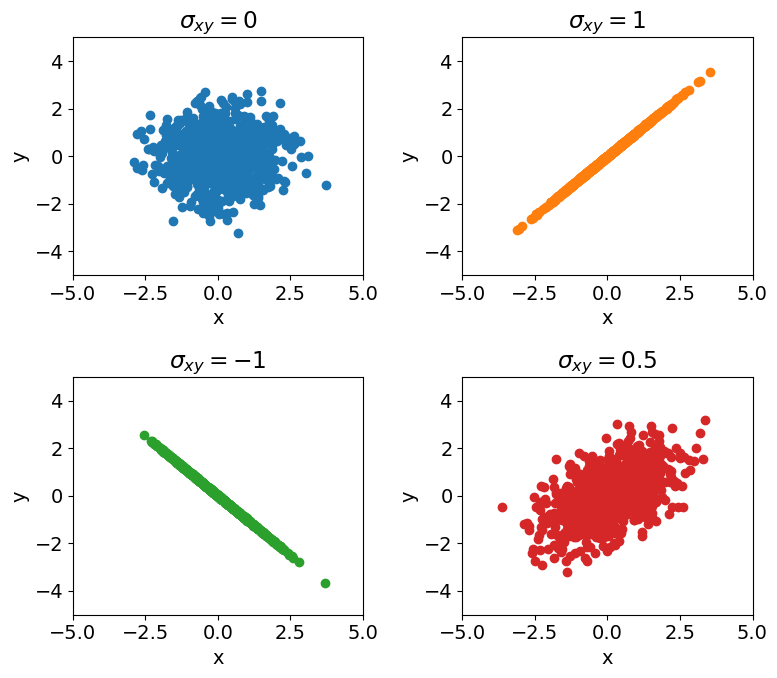

In [3]:
## Instantiate a figure object with 2 rows and 2 columns of subplots
## where each subplot is an axes object
fig, axes = plt.subplots(2, 2, figsize=(8,7))

## Draw a 2D gaussian with different values of covariance, but the same
## individual variances for each variable x and y
covs = [0, 1, -1, 0.5]

## Generate samples for each value of covariance and plot them each with
## a unique color
vals_0 = draw_2d_gaussian(axes[0,0], 'C0', 1000, 1, 1, covs[0])
vals_1 = draw_2d_gaussian(axes[0,1], 'C1', 1000, 1, 1, covs[1])
vals_2 = draw_2d_gaussian(axes[1,0], 'C2', 1000, 1, 1, covs[2])
vals_3 = draw_2d_gaussian(axes[1,1], 'C3', 1000, 1, 1, covs[3])

## Generate some titles for each subplot
for ind, cov in enumerate(covs):
    row, col = divmod(ind, 2)  # Calculate row and column indices
    axes[row, col].set_title(f"$\sigma_{{xy}} = {cov}$")

fig.tight_layout()

plt.show()

### Optional Coding Exercise

##### How could you change the cell above so the plotting happens within a for loop? Similar to how we've looped over the values of covariance in generating titles for each plot

In [4]:
## Compute covariance matrix from the generated data and display it
print("Covariance matrix for plot 0,0:\n", np.cov(vals_0), end="\n\n")
print("Covariance matrix for plot 0,1:\n", np.cov(vals_1), end="\n\n")
print("Covariance matrix for plot 1,0:\n", np.cov(vals_2), end="\n\n")
print("Covariance matrix for plot 1,1:\n", np.cov(vals_3), end="\n\n")

Covariance matrix for plot 0,0:
 [[0.99317845 0.02627649]
 [0.02627649 0.92818075]]

Covariance matrix for plot 0,1:
 [[1.01267905 1.01284144]
 [1.01284144 1.0131935 ]]

Covariance matrix for plot 1,0:
 [[ 0.95864011 -0.95867447]
 [-0.95867447  0.95892525]]

Covariance matrix for plot 1,1:
 [[1.08225407 0.53304046]
 [0.53304046 1.0124837 ]]



### Effect of changing the variances, $\sigma_{xx}, \sigma_{yy}$:

Let's make 4 plots with different variances.

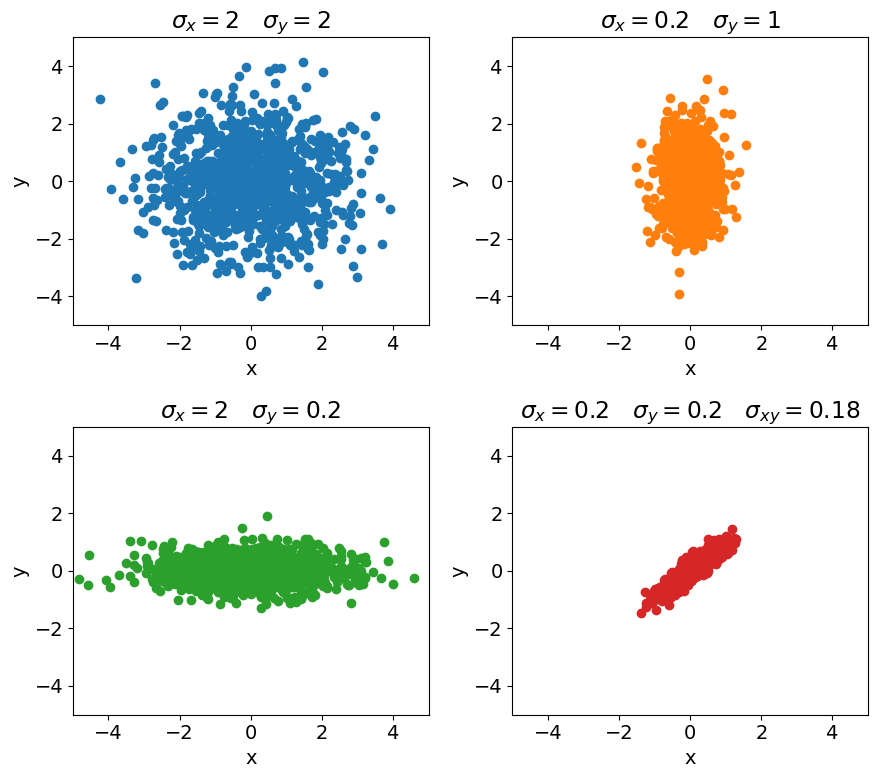

In [5]:
## Instantiate a figure object with 2 rows and 2 columns of subplots
## where each subplot is an axes object
fig, axes = plt.subplots(2, 2, figsize=(9,8))

## Sample from distributions with varying values of variance. You can 
## change the values and see what happens!
var0 = [2, 2]
vals_0 = draw_2d_gaussian(axes[0,0], 'C0', 1000, var0[0], var0[1], 0)
axes[0,0].set_title(f"$\sigma_x = {var0[0]} \quad \sigma_y = {var0[1]}$")

var1 = [0.2, 1]
vals_1 = draw_2d_gaussian(axes[0,1], 'C1', 1000, var1[0], var1[1], 0)
axes[0,1].set_title(f"$\sigma_x = {var1[0]} \quad \sigma_y = {var1[1]}$")

var2 = [2, 0.2]
vals_2 = draw_2d_gaussian(axes[1,0], 'C2', 1000, var2[0], var2[1], 0)
axes[1,0].set_title(f"$\sigma_x = {var2[0]} \quad \sigma_y = {var2[1]}$")

var3 = [0.2, 0.2]
vals_3 = draw_2d_gaussian(axes[1,1], 'C3', 1000, var3[0], var3[1], 0.18)
axes[1,1].set_title(f"$\sigma_x = {var3[0]} \quad \sigma_y = {var3[1]} \quad \sigma_{{xy}} = 0.18$")

fig.tight_layout()

plt.show()

In [6]:
## Compute covariance matrix from the generated data
print("Covariance matrix for plot 0,0:\n", np.cov(vals_0), end="\n\n")
print("Covariance matrix for plot 0,1:\n", np.cov(vals_1), end="\n\n")
print("Covariance matrix for plot 1,0:\n", np.cov(vals_2), end="\n\n")
print("Covariance matrix for plot 1,1:\n", np.cov(vals_3), end="\n\n")

Covariance matrix for plot 0,0:
 [[ 1.84306328 -0.02076465]
 [-0.02076465  1.84482687]]

Covariance matrix for plot 0,1:
 [[0.19827478 0.00709328]
 [0.00709328 1.01235635]]

Covariance matrix for plot 1,0:
 [[ 2.00081756 -0.01258017]
 [-0.01258017  0.19479193]]

Covariance matrix for plot 1,1:
 [[0.20215722 0.18194865]
 [0.18194865 0.20048887]]



### Questions for discussion

#### 1.1 Do the plots look how you expected? Explain how the shapes and spread of the four plots relate to the values you see in the covariance matrix. 

### Another way to consider correlations is to ask what part of the variance in one quantity is  tied to the variance of another quantity.

To do this, we want to factor out the variances of the two quantities and compute the "correlation factor" or "correlation coefficient".

$c_{xy} = \frac{\sigma_{xy}}{\sqrt{\sigma_{xx}\sigma_{yy}}}$

Note that $c_{xx} = c_{yy} = 1$, i.e., each quantity is 100% correlated with itself.

We can again put together $c_{xx}$, $c_{yy}$, $c_{xy}$ in a matrix called the **correlation matrix**:
$$
\begin{bmatrix}
c_{xx} & c_{xy} \\
c_{yx} & c_{yy} \\
\end{bmatrix}
$$

Let's remake the second set of plots again and evaluate the correlations so we can examine them at the same time.


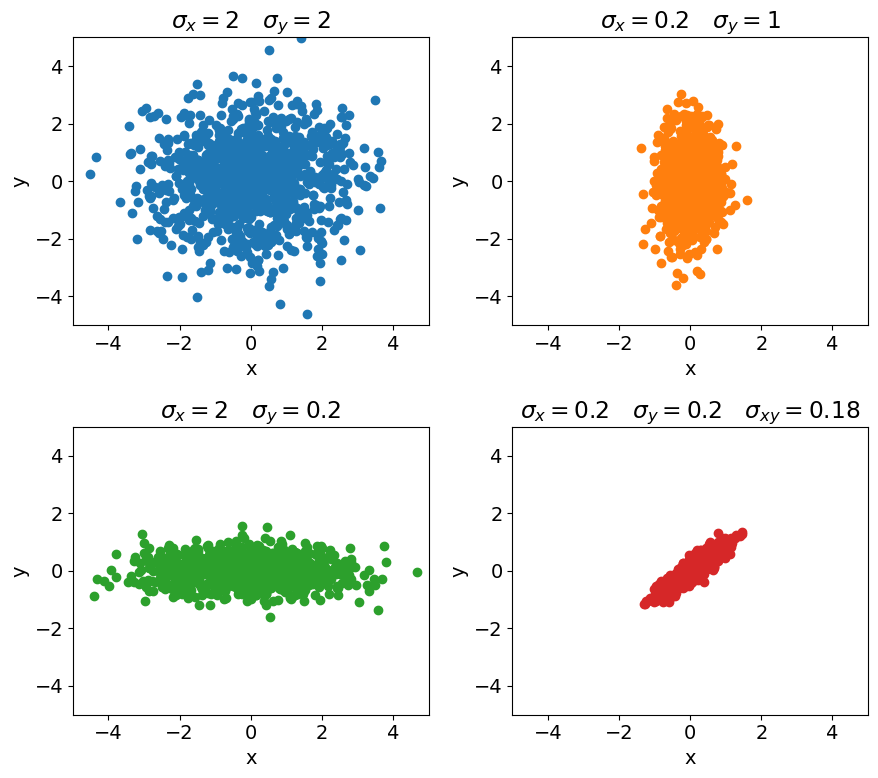

Correlation matrix for plot 0,0:
 [[1.         0.03642425]
 [0.03642425 1.        ]]

Correlation matrix for plot 0,1:
 [[1.         0.04637217]
 [0.04637217 1.        ]]

Correlation matrix for plot 1,0:
 [[ 1.       -0.014015]
 [-0.014015  1.      ]]

Correlation matrix for plot 1,1:
 [[1.         0.89570988]
 [0.89570988 1.        ]]



In [7]:
## Instantiate a figure object with 2 rows and 2 columns of subplots
## where each subplot is an axes object
fig, axes = plt.subplots(2, 2, figsize=(9,8))

## Sample from distributions with varying values of variance. You can 
## change the values and see what happens!
var0 = [2, 2]
vals_0 = draw_2d_gaussian(axes[0,0], 'C0', 1000, var0[0], var0[1], 0)
axes[0,0].set_title(f"$\sigma_x = {var0[0]} \quad \sigma_y = {var0[1]}$")

var1 = [0.2, 1]
vals_1 = draw_2d_gaussian(axes[0,1], 'C1', 1000, var1[0], var1[1], 0)
axes[0,1].set_title(f"$\sigma_x = {var1[0]} \quad \sigma_y = {var1[1]}$")

var2 = [2, 0.2]
vals_2 = draw_2d_gaussian(axes[1,0], 'C2', 1000, var2[0], var2[1], 0)
axes[1,0].set_title(f"$\sigma_x = {var2[0]} \quad \sigma_y = {var2[1]}$")

var3 = [0.2, 0.2]
vals_3 = draw_2d_gaussian(axes[1,1], 'C3', 1000, var3[0], var3[1], 0.18)
axes[1,1].set_title(f"$\sigma_x = {var3[0]} \quad \sigma_y = {var3[1]} \quad \sigma_{{xy}} = 0.18$")

fig.tight_layout()

plt.show()


## Examine the correlation matrix for each plot
print("Correlation matrix for plot 0,0:\n", np.corrcoef(vals_0), end="\n\n")
print("Correlation matrix for plot 0,1:\n", np.corrcoef(vals_1), end="\n\n")
print("Correlation matrix for plot 1,0:\n", np.corrcoef(vals_2), end="\n\n")
print("Correlation matrix for plot 1,1:\n", np.corrcoef(vals_3), end="\n\n")

### Question for discussion

#### 2.1 What do you see as the advantage / disadvantage of using correlation versus covariance?

## Ok, let's load up the Vela data

This is the same stuff we used to load the data last week.  

In [8]:
data = np.loadtxt(open("../data/Vela_Flux.txt", 'rb'), usecols=range(7))

## This is how we pull out the data from columns in the array.

## This is the date in "Mission Elapsed Time" For the Fermi mission, this 
## is defined to be the number of seconds since the start of 2001.
date_MET = data[:,0]

## This is the offset in seconds between the Fermi "MET" and the UNIX 
## "epoch" used by matplotlib
MET_To_Unix = 978336000

## These are the number of photons observed from Vela each week in 
## the "low" Energy Band (100 MeV - 800 MeV)
nObs_LE = data[:,1]

## These are the number of photons expected from Vela each week, under 
## the assumption that it is not varying at all, and the only differences 
## depend on how long we spent looking at Vela that particular weeek
nExp_LE = data[:,2]

## These are the band bounds, in MeV
LE_bounds = (100., 800.)

## We will also take a look at data in the "high" energy band 
## (800 MeV - 10000 MeV)
nObs_HE = data[:,4]
nExp_HE = data[:,5]
signif_HE = data[:6]
HE_bounds = (800., 10000.)

## This converts the dates to something that matplotlib understands
dates = [datetime.datetime.fromtimestamp(date + MET_To_Unix) for date in date_MET]

### Example with quantities that are highly correlated.

Last week we saw that for the Vela data the numbers of observed and expected counts where highly correlated.  I.e., that Vela wasn't flaring unexpectedly.

Let's quantify that.

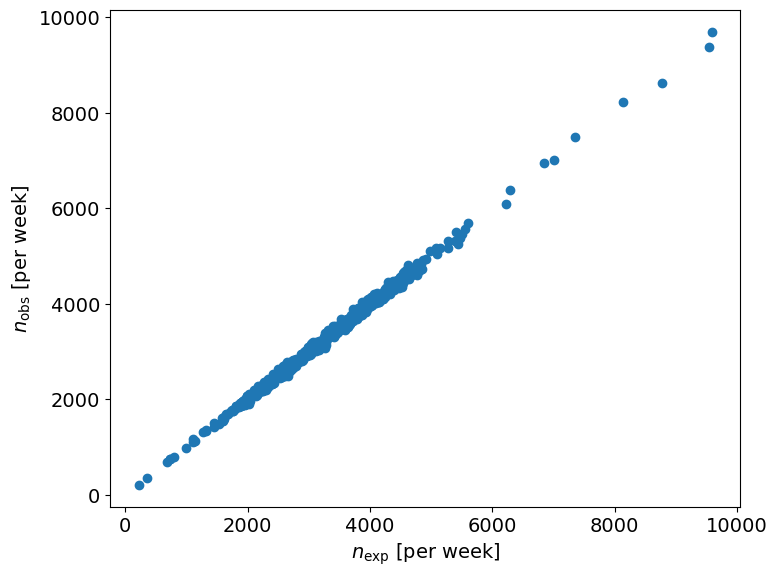

The expected counts are 0.998 correlated with the observed counts


In [9]:
## Plot the expected counts vs the observed counts
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(nExp_LE, nObs_LE)
ax.set_xlabel(r"$n_{\rm exp}$ [per week]")
ax.set_ylabel(r"$n_{\rm obs}$ [per week]")

fig.tight_layout()

plt.show()


## Use numpy to estimate the correlation coefficient between the 
## expected and observed counts
correl = np.corrcoef(nObs_LE, nExp_LE)
print(f"The expected counts are {correl[0,1]:0.3f} correlated with the observed counts")

### Is there a long-term trend to the Vela flux?

Let's use the correlation to see if there is a long-term trend to the Vela pulsar flux. 

Ok, so let's convert the time axis to a nice small number (i.e., let's scale the time to years, and let's set the zero point to something in the middle of the time range).  This will save us having lots of really big numbers floating around, which would happen if we left the time in seconds since 2001.

In [10]:
## Convert the MET time to years since mid-2014
date_YEAR = 2001 +  (date_MET / (24*3600*365))
years_since_mid_2014 = date_YEAR  - 2014.5

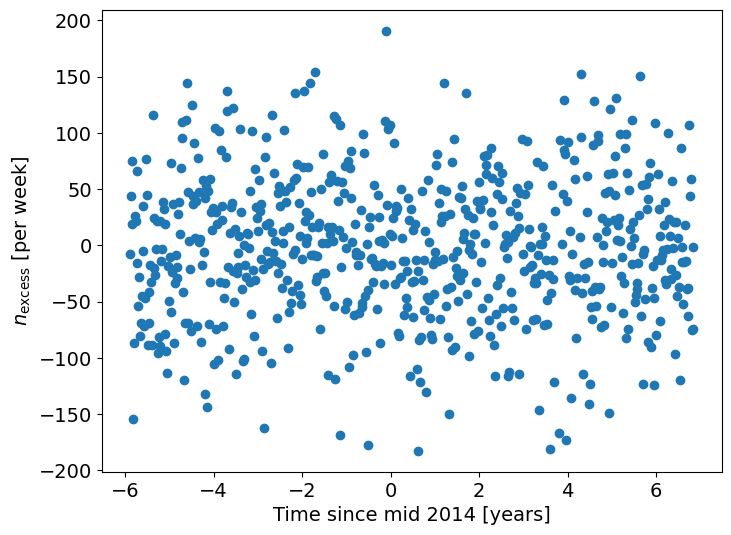

In [11]:
## Calculate the excess counts
excess_counts = nObs_LE - nExp_LE

## Plot the excess counts vs the time since mid-2014
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(years_since_mid_2014, excess_counts)
ax.set_xlabel(r"Time since mid 2014 [years]")
ax.set_ylabel(r"$n_{\rm excess}$ [per week]")

plt.show()

In [12]:
## Use numpy to estimate a covariance matrix from the data
cov = np.cov(years_since_mid_2014, excess_counts)

## Use numpy to estimate a correlation matrix from the data
correl = np.corrcoef(years_since_mid_2014, excess_counts)

### Let's have a look at the pieces of the covariance matrix

In [13]:
print(f"                           The xx element of the covariance matrix is: {cov[0,0]:.2f} years**2")
print(f"          The standard deviation of the x element (i.e., the year) is: {np.sqrt(cov[0,0]):.2f} years")
print(f"                           The yy element of the covariance matrix is: {cov[1,1]:.2f} counts**2")
print(f"The standard deviation of the yy element (i.e., the excess counts) is: {np.sqrt(cov[1,1]):.1f} counts")
print(f"                           The xy element of the covariance matrix is: {cov[0,1]:.2f} years*counts")
print(f"                                   The x-y correlation coefficient is: {correl[0,1]:.3f}")

                           The xx element of the covariance matrix is: 13.65 years**2
          The standard deviation of the x element (i.e., the year) is: 3.69 years
                           The yy element of the covariance matrix is: 3973.27 counts**2
The standard deviation of the yy element (i.e., the excess counts) is: 63.0 counts
                           The xy element of the covariance matrix is: -2.95 years*counts
                                   The x-y correlation coefficient is: -0.013


### Question for discussion

#### 3.1 Do you think that the small correlation we found in time vs $n_{\rm obs}$ is going to be statistically significant?  Why or why not?  (Some things you might want to think about: Does the contrast between the last two plots affect your opinion?  What about the difference between the correlation values?)